# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования**

*1)Определить рыночную стоимость объектов недвижимости.*

*2)Установите параметры, влияющие на цену объектов.*

*3)Построить автоматизированную систему, которая способна отследить аномалии и мошенническую деятельность.*

**Ход исследования**

Для начала работы я получу данные из CSV-файла:'/datasets/real_estate_data.csv'. Неизвестно в этом датефрейме качество данных, поэтому необходимо перед началом анализа провести обзор данных. Я проверю данные на ошибки и оценю их влияние на исследование. На этапе предобработки по возможности исправлю данные ошибки, не исказив конечный результат исследования. Создам новые столбцы для внесения конкретики, затем приступлю к исследованию.

- Обзор данных.

- Предобработка данных.

- Расчёт и добавление новых атрибутов для внесения конкретики.


- Исследовательский анализ данных(изучение всех атрибутов, изучение факторов которые влияют на стоимость, изучение и категоризация времени продажи помещений и др.).

- Подведение итогов работы: общий вывод.

### Документация

![alt текст]("C://Users//79377//Downloads//doc_for_df.jpg")

### Откройте файл с данными и изучите общую информацию


**Импортируем необходимые библиотеки**

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime

**Записываем в переменную наш датафрейм**

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# замечаем что в файле сепаратором(разделителем) служит '\t', использовав метод head()

*Замечаем что в файле сепаратором(разделителем) служит '\t', использовав метод head()*

**Выводим первые 20 строчек датафрейма data на экран для проверки правильности чтения файла и частичного ознакомления**

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Сразу обращаем внимание на наличие пропусков в таблице и типы данных**

**Выводим основную информацию о датафрейме с помощью метода info()**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*Первые 5 атрибутов('total_images' - 'rooms'(включительно)), а также 'floor', 'studio', 'open_plan' - не имеют пропусков, в остальных атрибутах с пропусками необходимо поработать. Нужно переименовать некоторые колонки для соблюдения единого стиля.*

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


*После первичного ознакомление с датасетом однозначно можно сказать, что присутствует внушительное количество пропусков(неопределённых значений), а также имеются аномалии(допустим максимальное значение в 'ceiling_height' = 100), нарушена стилистика названий(хороший тон в виде snake_case нарушен), документация в наличии(составлять и прописывать не нужно).*

*Зафиксируем количество строк исходного латафрейма чтобы после процесса предобработки посчитать потери*

In [7]:
primary_df = len(data)

*Построю гистограммы для атрибутов датафрейма с целью первичного ознакомления(позже раскроим их более подробно):*

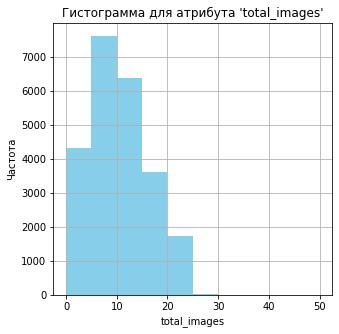

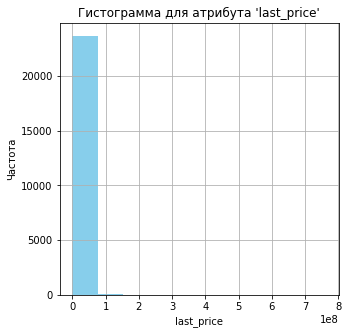

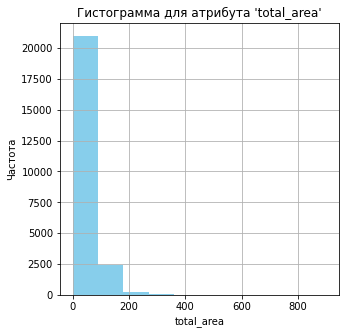

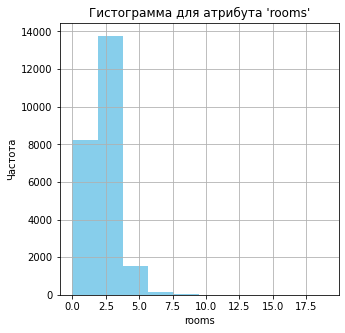

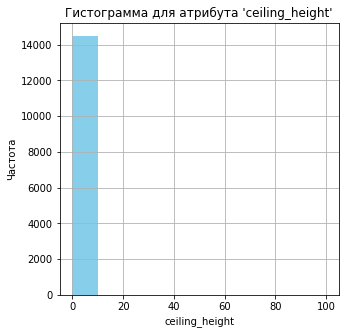

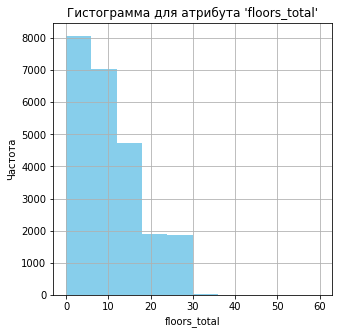

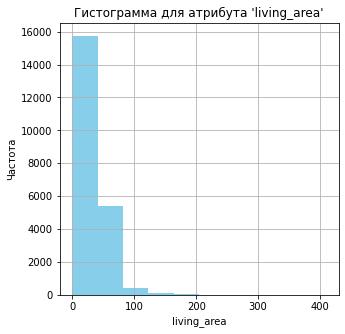

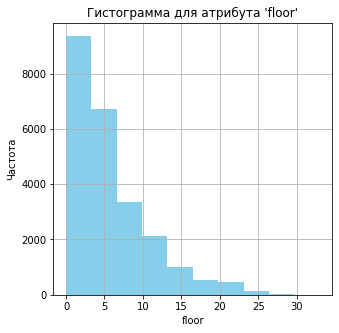

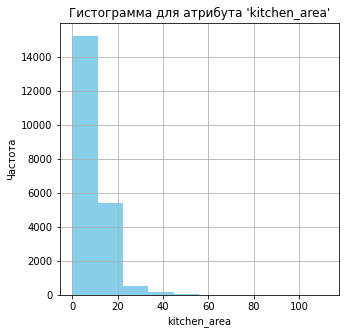

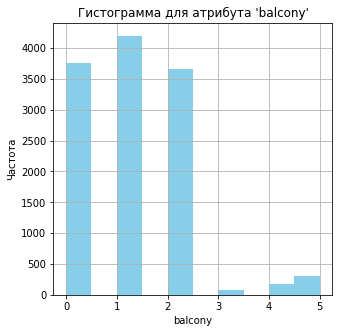

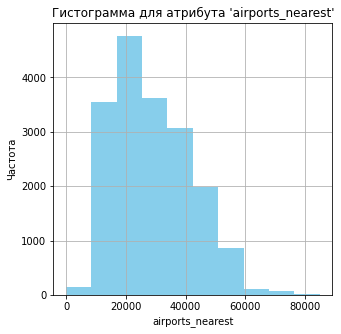

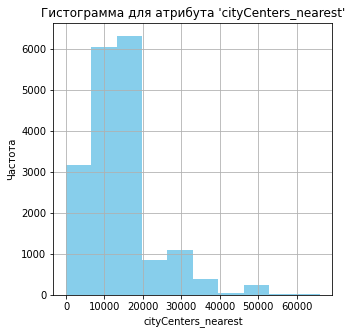

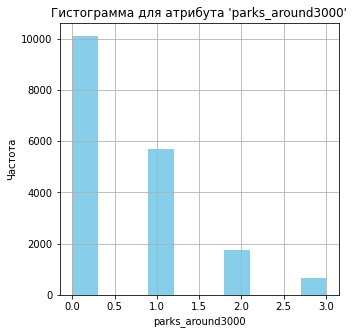

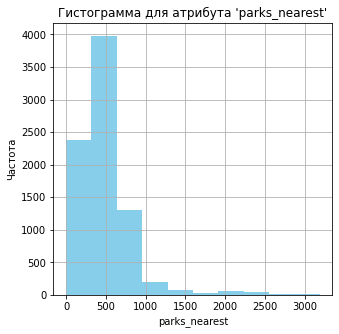

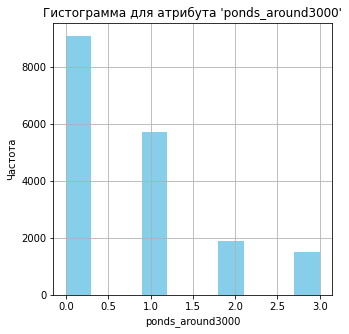

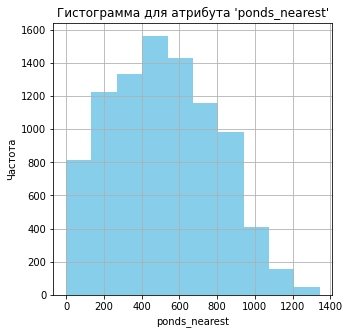

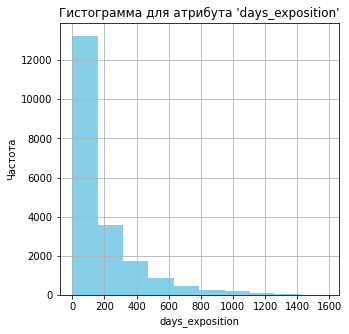

In [8]:
for attribute in data.keys():
    if data[attribute].dtype == 'int64' or data[attribute].dtype == 'float64':
        if data[attribute].isnull().values.any():
            max_val = data[attribute].max(skipna=True)
        else:
            max_val = data[attribute].max()
        data[attribute].hist(figsize=(5, 5), color='skyblue', range=(0, max_val))
        plt.xlabel(attribute)
        plt.ylabel('Частота')
        plt.title('Гистограмма для атрибута ' + '\'' + attribute + '\'')
        plt.show()

### Выполните предобработку данных

**Переименуем столбцы которые нарушают требования единого стиля** 

*Замечаем что где поля атрибута являются булевого типа должно быть 'is_' в начале. Приводим к единому стилю(snake_case).*

In [9]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                   'parks_around3000': 'parks_around_3000',
                   'ponds_around3000': 'ponds_around_3000',
                   'open_plan': 'is_open_plan',
                   'studio': 'is_studio'})

**Проверяем наши обновлённые названия атрибутов**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  is_studio             23699 non-null  bool   
 11  is_open_plan          23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**2.Выведем количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Найдём процентое соотношение пропусков в каждом атрибуте ко всему количеству полей атрибута:**

In [12]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**3.1. Работа с аномалиями и пропущенными значениями.**

*1)Работа с пропусками в "locality_name":*

In [12]:
data['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

**В данном столбце с категориальными переменными(категориальные они т.к. при использовании describe() характерестических значений подобно квартилям(и др.) не возникает, а также значения нельзя сравнить)присутсвует тип пропусков - MAR (Missing At Random), случайные(т.к. пропуски можно восстановить опираясь на столбец - 'city_centers_nearest')**

**Протяжённость Петербурга в административных границах: с севера на юг в пределах КАД — 32 км (за пределами КАД — 52 км), с северо-запада на юго-восток за пределами КАД,— около 90 км. Таким образом если в строке расстояние до центра в пределах 16 км(32км/2), то можно восстановить пропуск константой 'Санкт-Петербург'**

In [13]:
data.loc[(data['city_centers_nearest'] < 16000) & (data['locality_name'].isna()), :]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
7114,5,4250000.0,56.00,2016-03-16T00:00:00,3,NaN,5.0,40.00,4,NaN,...,6.00,0.0,NaN,14031.0,8582.0,0.0,NaN,0.0,NaN,96.0
7330,8,5100000.0,63.00,2015-01-27T00:00:00,3,NaN,5.0,42.00,1,False,...,7.50,0.0,NaN,25925.0,4627.0,2.0,459.0,0.0,NaN,566.0
7600,8,6800000.0,70.00,2016-01-31T00:00:00,3,NaN,11.0,42.00,9,NaN,...,11.00,1.0,NaN,37123.0,12332.0,0.0,NaN,0.0,NaN,209.0
8568,10,16000000.0,155.00,2016-05-09T00:00:00,3,NaN,6.0,94.00,3,NaN,...,23.00,0.0,NaN,24233.0,4065.0,1.0,547.0,0.0,NaN,248.0


In [14]:
data.loc[(data['city_centers_nearest'] < 16000) & (data['locality_name'].isna()), 'locality_name'] = data.loc[(data['city_centers_nearest'] < 16000) & (data['locality_name'].isna()), 'locality_name'].fillna('Санкт-Петербург')

In [15]:
data['locality_name'].isna().sum()

21

**У нас получилось избавиться от некоторорых случайных пропусков(MAR), что не смогли восстановить -  удалим**

In [16]:
data = data.dropna(subset = ['locality_name'])
data['locality_name'].isna().sum()

0

**Исключим неявные дубликаты: "посёлок" и "поселок", которые подразумевают одно и то же.**

In [17]:
len(data['locality_name'].unique())

364

*Посчитали для сравнения с последующими изменениями*

**Изменим тип данных в 'locality_name'**

In [18]:
data['locality_name'] = data['locality_name'].astype(str)

In [19]:
data = data.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

len(data.locality_name.unique())

333

*Избавились от 30-и неявных дубликата.*

*Создаём функцию для создания гистограммы(параметр ec(edge color) отвечает за обрамление графика):*

In [20]:
def hist_PLT(col, data, xlabel_user_text, x_1, x_2, n):
    df = data[col].plot(kind='hist', color='purple', grid=True, range=(x_1, x_2), bins=n, ec='green')
    df.set_xlabel(xlabel_user_text)  # устанавливаем название для оси x
    df.set_ylabel('Количество записей')  # устанавливаем название для оси y
    print(df)

*2)Работа с пропусками в "is_apartment":*

**Главное отличие апартаментов от квартир — юридический статус. Апартаменты относятся к нежилым помещениям, то есть формально человек приобретает не жилье, а коммерческую недвижимость(информация из статьи с ссылкой на «Гражданский процессуальный кодекс Российской Федерации» от 14.11.2002 N 138-ФЗ (ред. от 24.06.2023, с изм. от 20.07.2023) // СПС КонсультантПлюс). Исходя из этого можно однозначно утверждать что в апартаментах жилая площадь в квадратных метрах (м²)(living_area) отсутствует.**

In [21]:
len(data[(data['is_apartment'].isna()) & (data['living_area'].isna())])

1781

**Восстановим эти случайные(Missing At Random) пропуски: если есть жилая площадь - не апартаменты, нет жилой площади - апартаменты**

In [22]:
data.loc[(data['is_apartment'].isna()) & (data['living_area'].isna()), 'is_apartment'] = True
data.loc[(data['is_apartment'].isna()) & (~data['living_area'].isna()), 'is_apartment'] = False

In [23]:
data['is_apartment'].isna().sum()

0

**Мы восстановили все пропуски в 'is_apartment', таким образом можно сказать что это были полностью случайные пропуски(MCAR(Missing Completely At Random)). Также изменим тип данных:**

In [24]:
data['is_apartment'] = data['is_apartment'].astype(bool)

*3)Работа с пропусками в "floors_total": у нас не имеется атрибутов, позволяющих однозначно установить количество этажей в доме(вносить лишние искажение не охото из-за незначительности пропусков(их 52)), можем считать что данный тип пропусков полностью случайный(MNAR (Missing Not At Random), так как для этого атрибута предусмотрен количественный тип данных, то с целью корректного проведения статистического анализа, нам придётся удалить данные записи(в категориальных можно заменить на перманентное значение)*

In [25]:
data = data.dropna(subset = ['floors_total'])

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9103
floors_total                0
living_area              1867
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area             2226
balcony                 11475
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000        5500
parks_nearest           15548
ponds_around_3000        5500
ponds_nearest           14542
days_exposition          3171
dtype: int64

*Мы стараемся соблюдать корректный тип данных для того чтобы использовать функционал библиотеки максимально эффективно,экономить память при хранении и т.д.*

*По требованию и для нахождения аномалии поменяем тип данных в  'first_day_exposition'*

In [27]:
# format '2014-11-27T00:00:00'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [28]:
data['floors_total'].describe()

count    23593.000000
mean        10.670877
std          6.593773
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

*Если заглянуть в рейтинг самых высоких зданий Санкт-Петербурга, то можно обнаружить что на данный момент самым высоким зданием является Лахта-центр(87 этажей), который был построен в 2019 году, вторую строчку рейтинга занимает Лидер Тауэр, где уже 42 этажа... Если у нас максимальным значением в 'floors_total' является 60, то значит  объявлении о продаже помещений в Лахта-центре нет в базе, топ-2 занимает здание с 42-мя этажами(рейтинг составлялся по высоте, а значит возможно есть 'низкие' многоэтажки, но после поиска на ЦИАНе и ДомКлике становится ясно что помещений выше 42-го этажа у них тоже нет), а значит всё что выше 42-го этажа мы объявим как аномалии(выбросы) и удалим их(можно было ещё превратить их в пропуски и присвоить медиану или межквартильное среднее, но их всего 2).*

In [29]:
data = data.loc[data['floors_total'] < 42] 

*Изменим тип данных на целочисленный(int)*

In [30]:
data['floors_total'] = data['floors_total'].astype('int')

*Построим гистограмму для абсолютного количества этажей*

AxesSubplot(0.125,0.125;0.775x0.755)


count    23591.000000
mean        10.667034
std          6.580726
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

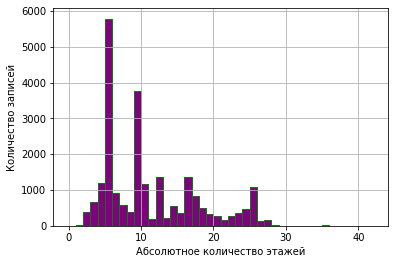

In [31]:
hist_PLT('floors_total', data, 'Абсолютное количество этажей', 0, 42, 42)
data['floors_total'].describe()

*Где-то помещений на определённом этаже больше, где-то меньше: основной размах ложиться на диапозон от 1-го до 30-го этажа.*

*3)Работа с пропусками в "balcony": у нас имеется огромное число пропусков в данном столбце. Невозможно найти связь с другим атрибутом,  считаю что пропуск в данных обозначает отсутствие балконов, а поэтому заменим Nan-ы на '0'(т.к. в данном столбце подразумевается хранение количественных переменных)*

In [32]:
data.loc[data['balcony'].isna(), 'balcony'] = 0

In [33]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9103
floors_total                0
living_area              1867
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area             2226
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000        5500
parks_nearest           15548
ponds_around_3000        5500
ponds_nearest           14541
days_exposition          3171
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


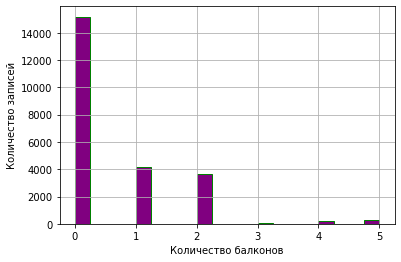

In [34]:
# Построим гистограмму для количества балконов
hist_PLT('balcony', data, 'Количество балконов', 0, 5, 20)

In [35]:
data['balcony'].describe()

count    23591.000000
mean         0.593362
std          0.960565
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

**Видно из гистограммы, что в большинстве случаев помещения в нашей выборке не имеют балкона, количество помещений с 1-им и 2-мя балконами не сильно отличаются(что довольно нестандартно). Основные показатели описательной статистики не сигнализируют о наличии явных аномалий**

*Проверим есть ли остаток у чисел в стобце с количеством балконов(если есть, то от них избавляемся, т.к. это противоречит здравому смыслу и мешает поменять тип данных в столбце). Если остатка нет, то спокойно меняем тип данных.*

In [36]:
data['balcony'] = data['balcony'].astype('int')

4)Работа с пропусками в "ceiling_height":

*Построим гистограмму для высоты потолков*

AxesSubplot(0.125,0.125;0.775x0.755)


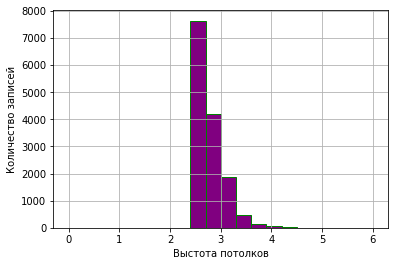

In [37]:
hist_PLT('ceiling_height', data, 'Выстота потолков', 0, 6, 20)

In [38]:
data['ceiling_height'].describe()

count    14488.000000
mean         2.771517
std          1.261748
min          1.000000
25%          2.517500
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

*Мы видим на гистограмме что у нас имёются аномалии в данных столбца, т.к. в своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м, а в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 м.(СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные»), а у нас тут имеются значения меньше 2.5 м. Известно, что в идеале высота потолка в квартире должна быть не меньше 2,5 м, не больше 2,7 м. Максимальная высота потолков, как правило, не регламентируется, но чаще всего она в современной застройке не превышает 3,2 метра. В старых домах с увеличенными габаритами и площадью, потолки могут быть 4 метра высотой и более.*

*Будем считать аномальной высотой помещение всё что ниже 2.5 м. и выше 5 м.. Присвоим Nan аномальным значениям чтобы не терять данные*

In [39]:
data.loc[(data['ceiling_height'] > 5) | (data['ceiling_height'] < 2.5),'ceiling_height'] = pd.NA

*Теперь нам нужно пропуски заменить на какое-нибудь значение(мы возьмём медиану) т. к. количество этих пропусков велико и их уже просто так удалять нельзя. Категоризуем помещения по предназначению и цене с помощью функции*

*Напишем функцию для категоризации:*

In [40]:
def price_category(data):
    is_apart = data['is_apartment']
    price = data['last_price']
    try:   
        if is_apart == False and 0 <= price <= 4000000:
            return 'бюджетная'
        elif is_apart == False and 4000001 <= price <= 14000000:
            return 'обычная'
        elif is_apart == False and 14000001 <= price <= 35000000:
            return 'бизнес'
        elif is_apart == False and 35000001 <= price:
            return 'люкс'
        elif is_apart == True:
            return 'апартаменты'
        
    except:
        pass

In [41]:
data['price_category'] = data.apply(price_category, axis=1)

*Заменим пропуски в высоте помещений медианой для каждой категории*

In [42]:
for cy in data['price_category'].unique():
    data.loc[(data['price_category'] == cy) & (data['ceiling_height'].isna()), 'ceiling_height'] = data[data['price_category'] == cy]['ceiling_height'].median()

AxesSubplot(0.125,0.125;0.775x0.755)


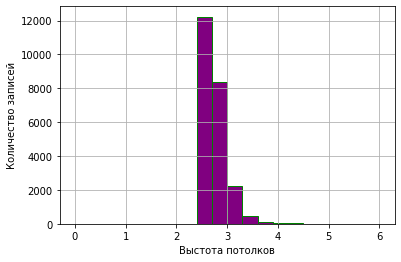

In [43]:
hist_PLT('ceiling_height', data, 'Выстота потолков', 0, 6, 20)

*Получилась гистограмма на которой можно заметить такую тенденцию: основная часть помещений имеет высоту потолков от 2.5 метра до 3 метров. Заменим тип данный на числовой с плавающей точкой(float)*

In [44]:
data['ceiling_height'] = data['ceiling_height'].astype('float')

5)Работа с пропусками в "living_area":

*И снова обращаемся к этой информации из которой подмечаем что в жилой площади в апартаментах нет и пытаемся восстановить пропуски(заменяя их на 0 в апартаментах)*

*Главное отличие апартаментов от квартир — юридический статус. Апартаменты относятся к нежилым помещениям, то есть формально человек приобретает не жилье, а коммерческую недвижимость(информация из статьи с ссылкой на «Гражданский процессуальный кодекс Российской Федерации» от 14.11.2002 N 138-ФЗ (ред. от 24.06.2023, с изм. от 20.07.2023) // СПС КонсультантПлюс). Исходя из этого можно однозначно утверждать что в апартаментах жилая площадь в квадратных метрах (м²)(living_area) отсутствует.*

In [45]:
data.loc[(data['living_area'].isna()) & (data['is_apartment'] == True), 'living_area'] = 0

*Процент нежилой площади в жилых помещениях плавающий(обычно от 10% до 30%): примем 20% как процент нежилой площади в жтлых помещениях и с учётом этого запомним оставшиеся пропуски*

In [46]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.8)

*Построим гистограмму для жилой площади:*

AxesSubplot(0.125,0.125;0.775x0.755)


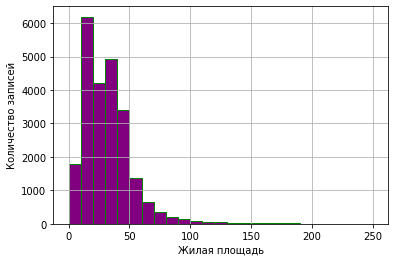

In [47]:
hist_PLT('living_area', data, 'Жилая площадь', 0, 250, 25)

*Большинство помещений имеют жилую площадь до 50-и метров, также видим что имеются помещения с отсутсвующей жилой площадью: это апартаменты(но на всякий случай посмотрим есть ли жилые помещения которые не являбтся апартаментами)*

In [48]:
data[(data['is_apartment'] == False) & (data['living_area'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_category


*Таких ошибок не имеем.*

*Стоит также помнить что для жилых помещений есть определённые критерий их пригодности и они следующие: Норма предоставления площади жилого помещения в собственность или по договору социального найма составляет:

1) 33 квадратных метра общей площади жилого помещения - на одного человека;

2) 42 квадратных метра общей площади жилого помещения - на семью из двух человек;

3) 18 квадратных метров общей площади жилого помещения на каждого члена семьи - на семью из трех и более человек.

Результируем: нам нужно избавиться от записей где фигурируют жилые помещения с площадью меньше 33 кв.м.*

In [49]:
# Удаляем 
data = data.drop(data[(data['is_apartment'] == False) & (data['total_area'] < 33)].index)

In [50]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area             1855
balcony                     0
locality_name               0
airports_nearest         4889
city_centers_nearest     4866
parks_around_3000        4865
parks_nearest           14041
ponds_around_3000        4865
ponds_nearest           13081
days_exposition          2971
price_category              0
dtype: int64

*От исходных данных у нас осталось чуть больше 90%, что пугает, но вероятно лучше избавиться от "проблемных" объявлений.*

6)Работа с пропусками в "days_exposition":

*Данный столбцец хранит значение количества дней нахождения объявления на сервисе(от начала публикации до снятия). Если у нас имёются пропуски в этой колонке, то вполне логично что объявление опубликовано, но не снято т.е. актуально по сей день. Примем это и заполним пропуски путём вычитания количество дней от текущей даты даты публицкации.*

In [51]:
current_date = datetime.now()
data.loc[data['days_exposition'].isna(), 'days_exposition'] = (current_date - data['first_day_exposition']).dt.days

*Поменяем тип данных на целочисленный т.к. он занимает меньше памяти и более уместен а контексте столбца*

In [52]:
data['days_exposition'] = data['days_exposition'].astype(int)

*Построим гистограмму для сроков жизни объявлений:*

AxesSubplot(0.125,0.125;0.775x0.755)


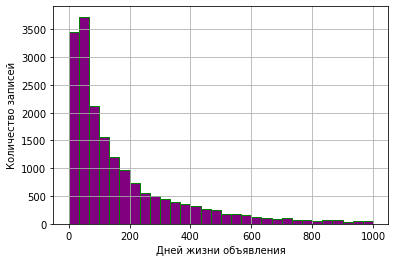

In [53]:
hist_PLT('days_exposition', data, 'Дней жизни объявления', 0, 1000, 30)

*Видим из гистограммы что помещения продаются регулярно, большая часть продаётся с интервалом до 200-т дней.*

*7)Работа с пропусками в "kitchen_area": нельзя адекватно восстановить данный пропуск(MNAR), но можно исключить те записи где площадь кухни суммарно с жилой площадью превосходит общую(т.к. всегда есть туалет и тд)*

In [54]:
# Удаляем 
data = data.drop(data[(data['is_apartment'] == False) & (data['living_area'] + data['kitchen_area'] > data['total_area'])].index)

*Построим гистограмму для площади кухон в помещениях:*

AxesSubplot(0.125,0.125;0.775x0.755)


count    19513.000000
mean        10.905444
std          6.004303
min          2.300000
25%          7.540000
50%          9.800000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

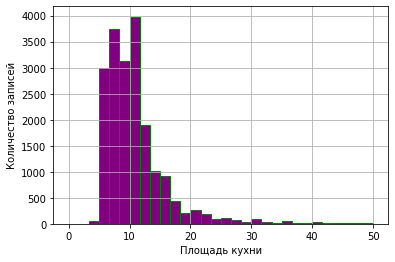

In [55]:
hist_PLT('kitchen_area', data, 'Площадь кухни', 0, 50, 30)
data['kitchen_area'].describe()

*Площадь кухни в основном 5-15 метров, настораживает кухня с площадбю 112 м. и 2.3 м. СНиП 31-01-2003 п 5.7 : " 5.7 Площадь помещений в квартирах, указанных в 5.3, должна быть не менее: жилого помещения (комнаты) в однокомнатной квартире - 14 м, общего жилого помещения в квартирах с числом комнат две и более - 16 м, спальни - 8 м (10 м - на двух человек); кухни - 8 м; кухонной зоны в кухне-столовой - 6 м. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м. Таким образом, все кухни меньше 5 метров исключим, кухню в 112 метров оставим.*

In [56]:
data = data.drop(data[data['kitchen_area'] < 5].index)

8)Работа с пропусками в "airports_nearest", "city_centers_nearest", "parks_around_3000", "ponds_around_3000", "ponds_nearest": Ни в одном из данных столбцов более менее достоверно восстановить пропуски не представляется возможным, оставим как есть, но для большего понимания можем в последующем создать булевые атритуты где будет хранится информация о следующем: есть ли хотя бы один водоём/парк в радиусе 3000 метров(опционально: посмотрим на необходимость в ходе исследовательского анализа данных). Строить гистограммы для данных столбцов не особо результативно, скорее внесёт негативный импакт в представление.

**3.2. Работа с аномалиями и внесение конкретики в состояние рынка жилья в рамках платформы размещения публикаций.**

*1)Поиск аномалий и конкретизация атрибута 'total_images':*

*Построим гистограмму для количества фотографий в публикациях:*

AxesSubplot(0.125,0.125;0.775x0.755)


count    21315.000000
mean        10.008539
std          5.729574
min          0.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

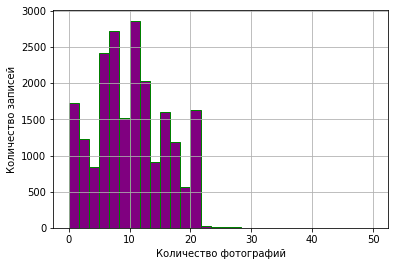

In [57]:
hist_PLT('total_images', data, 'Количество фотографий', 0, 50, 30)
data['total_images'].describe()

*Вполне адекватная гистограмма у нас получилась: количество фотографий в публикации достигает отметки в 50 штук, а также наличие объявлений с нулём фотографий не похоже на что-то невероятное. На практике действительно бывает что в публикации нет фотографии по различным причинам. Тип данных - целочисленный(не требует изменения).*

*2)Поиск аномалий и конкретизация атрибута 'last_price':*

*Построим гистограмму для конечной цены помещения:*

AxesSubplot(0.125,0.125;0.775x0.755)


count    2.131500e+04
mean     6.924597e+06
std      1.140144e+07
min      1.219000e+04
25%      3.700000e+06
50%      4.900000e+06
75%      7.100000e+06
max      7.630000e+08
Name: last_price, dtype: float64

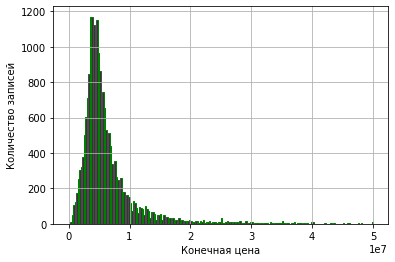

In [58]:
hist_PLT('last_price', data, 'Конечная цена', 0, 50000000, 200)
data['last_price'].describe()

*Большинство публикаций находится в диапозоне 1е7(10.000.000), что похоже на правду, но у нас тут есть странное минимальное значение: посмотрим на него и преобразуем(на данный момент мы уже потеряли значительную часть записей).Как же его преобразовать? Скорее всего цена в подобных публикациях выставлялась в тыс. рублей, поэтому нам необходимо домножить данное значение. Максимальное значение ~ 764.000.000: не будем его удалять т.к. по некоторым источникам самое дорогое жилое помещение было продано примерно за такую же сумму.*

In [59]:
data[data['last_price'] < 800000]['total_area'].describe()

count     82.000000
mean      44.056098
std        9.968718
min       31.000000
25%       38.125000
50%       43.000000
75%       46.800000
max      109.000000
Name: total_area, dtype: float64

*Мы увидили элементы описательной статистики жилья по площади стоимостью до 800.000: эти помещения приведены не в тыс. руб. т. к. не укладывается в здравый смысл продавать помещение до 50-и метров площадью за 50.000.000, но у нас всё равно есть запись со странностью(площадь-109м., цена-12.190 р.)*

In [60]:
data[data['last_price'] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_category
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8,бюджетная


*Как мы видим площадь в данном помещении не особо маленькая, а расстояние до центра не такое уж и большое: стоимость данного жилого помещения представлена даже не в тыс. руб., а скорее десятках тыс. руб.. Домножим цену на 10^3.*

In [61]:
data.loc[data['last_price'] < 400000, 'last_price'] *= 1000
# Можно было сделать с помощью 'replace()'

*Тип данных -целочисленный, не изменяем.*

*3)Поиск аномалий и конкретизация атрибута 'total_area':*

*Построим гистограмму для площади помещений:*

AxesSubplot(0.125,0.125;0.775x0.755)


count    21315.000000
mean        63.478036
std         36.064563
min         13.000000
25%         43.000000
50%         55.000000
75%         72.000000
max        900.000000
Name: total_area, dtype: float64

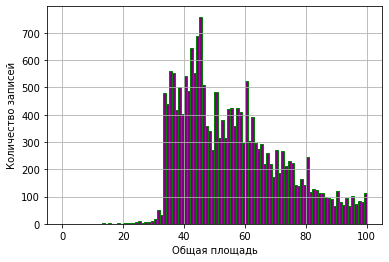

In [62]:
hist_PLT('total_area', data, 'Общая площадь', 0, 100, 100)
data['total_area'].describe()

*В основном продаются помещения ~32 кв.м. до ~60 кв.м. Минимальная площадь = 13 кв.м.,что спокойно вписывается в условие(правда только для апартаментов). Посмотрим запись с огромной площадью.*

In [63]:
data[data['total_area'] > 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_category
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5,0.0,5,True,...,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,1802,апартаменты
4237,1,50000000.0,517.0,2017-10-14,7,3.20,4,332.0,3,False,...,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,2334,люкс
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14,люкс
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.5,7,True,...,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078,апартаменты
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.3,4,False,...,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,1792,люкс
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111,люкс
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106,люкс


**"Космические" цены для "космических" площадей! Всё ясно, оставляем!**

*Тип данных - целочисленный, оставляем.*

*4)Конкретизация атрибута 'first_day_exposition': посмотрим только за какой период есть публикации*

In [64]:
print(data['first_day_exposition'].min(), '-', data['first_day_exposition'].max())

2014-11-27 00:00:00 - 2019-05-03 00:00:00


*Данные у нас с 2014-го года по 2019-ый.*

*5)Поиск аномалий и конкретизация атрибута 'rooms':*

*Построим гистограмму для количества комнат:*

AxesSubplot(0.125,0.125;0.775x0.755)


count    21315.000000
mean         2.187474
std          1.063413
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

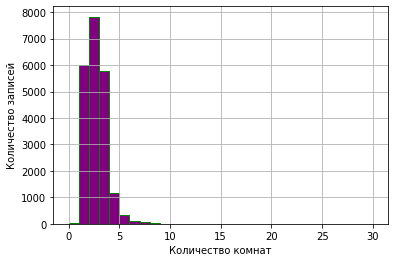

In [65]:
hist_PLT('rooms', data, 'Количество комнат', 0, 30, 30)
data['rooms'].describe()

*Всё приемлемо, кроме помещений с отсутствием комнат. Посмотрим на такие помещения: если там небольшая площадь, то присвоим таким помещениям значение '1'*

In [66]:
data[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_category
508,0,3375000.0,34.40,2017-03-28,0,2.55,26,24.30,19,False,...,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430,бюджетная
608,2,1850000.0,25.00,2019-02-20,0,2.65,10,0.00,7,True,...,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29,апартаменты
780,9,2600000.0,26.10,2018-02-20,0,2.65,18,0.00,8,True,...,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45,апартаменты
839,14,1900000.0,35.00,2017-04-14,0,2.70,5,15.00,3,False,...,1,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7,бюджетная
2409,4,1980000.0,27.00,2018-03-23,0,2.65,18,0.00,4,True,...,0,посёлок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75,апартаменты
3147,7,2170000.0,31.00,2017-12-30,0,2.60,12,0.00,12,True,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198,апартаменты
3458,6,7400000.0,73.60,2017-05-18,0,2.70,3,50.00,1,False,...,0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60,обычная
3874,13,1700000.0,21.40,2015-02-11,0,2.70,3,0.00,2,True,...,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,3310,апартаменты
4683,2,3650000.0,35.00,2018-02-01,0,2.55,25,23.40,25,False,...,0,Санкт-Петербург,43431.0,12188.0,0.0,NaN,0.0,NaN,100,бюджетная
5749,20,3590000.0,25.00,2017-08-30,0,2.80,35,0.00,26,True,...,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198,апартаменты


In [67]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

*Тип данных оставляем целочисленным.*

*6)Поиск аномалий и конкретизация атрибута 'floor':*

*Построим гистограмму для количества этажей:*

AxesSubplot(0.125,0.125;0.775x0.755)


count    21315.000000
mean         5.933662
std          4.887417
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

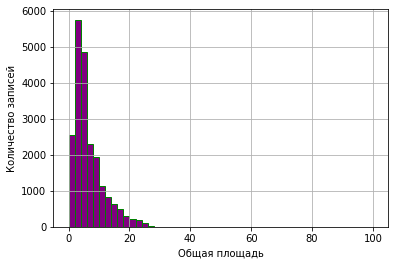

In [68]:
hist_PLT('floor', data, 'Общая площадь', 0, 100, 50)
data['floor'].describe()

*Этажи опубликованных помещений расположились в диапозоне [1, 33], но преимущественная концентрация на диапозоне [1, 10], аномалий нет, тип данных корректный с точки зрение логики и использования памяти.*

*7)Конкретика в 'is_apartment', 'is_studio', 'is_open_plan': это булевые атрибуты в котрых нет аномалий, смысла сравнить больше у нас апартаментов или жилых помещений, студия или нет, открытая планировка/нет, будто не особо имеет смысл, поэтому опустим это действие.*

**4. Работа с явными дубликатами**

In [69]:
data = data.drop_duplicates()

**Подведём промежуточный итог(итог предобработки): Нам удалось избавиться от значительного количества ошибочных(аномальных) записей, восстановить огромное количество пропусков, выявить и устранить неявные дубликаты в одном из атрибутов, убрать явные дубликаты, внести больше конкретики и понимания для каждого столбца датафрейма и подкорректировать типы данных. Доля остаточных(относительно чистых) данных , обновлённые типы данных, колисество пропусков в каждом атрибуте приведены ниже:**

*Доля остаточных(относительно чистых) данных*

In [70]:
round(len(data)/primary_df, 4) * 100

89.94

*90% с небольшим - приемлемо!*

*Подкорректированные типы данных посмотрим, используя метод info()*

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21315 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21315 non-null  int64         
 1   last_price            21315 non-null  float64       
 2   total_area            21315 non-null  float64       
 3   first_day_exposition  21315 non-null  datetime64[ns]
 4   rooms                 21315 non-null  int64         
 5   ceiling_height        21315 non-null  float64       
 6   floors_total          21315 non-null  int64         
 7   living_area           21315 non-null  float64       
 8   floor                 21315 non-null  int64         
 9   is_apartment          21315 non-null  bool          
 10  is_studio             21315 non-null  bool          
 11  is_open_plan          21315 non-null  bool          
 12  kitchen_area          19460 non-null  float64       
 13  balcony         

In [72]:
# Пропуски в каждом атрибуте
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area             1855
balcony                     0
locality_name               0
airports_nearest         4849
city_centers_nearest     4826
parks_around_3000        4825
parks_nearest           13949
ponds_around_3000        4825
ponds_nearest           12991
days_exposition             0
price_category              0
dtype: int64

In [73]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,21315.000000,2.131500e+04,21315.000000,21315.000000,21315.000000,21315.000000,21315.000000,21315.000000,19460.000000,21315.000000,16466.000000,16489.000000,16490.000000,7366.000000,16490.000000,8324.000000,21315.000000
mean,10.008539,6.925168e+06,63.478036,2.188600,2.708744,10.784096,33.439545,5.933662,10.923450,0.610978,28808.150856,13944.821639,0.613705,491.848900,0.784172,516.509010,434.546751
std,5.729574,1.140140e+07,36.064563,1.061624,0.229420,6.582498,23.713524,4.887417,6.002459,0.981919,12487.215643,8461.487480,0.801528,342.996876,0.948772,278.255048,666.426640
min,0.000000,4.300000e+05,13.000000,1.000000,2.500000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.700000e+06,43.000000,1.000000,2.550000,5.000000,18.700000,2.000000,7.600000,0.000000,18732.000000,8842.000000,0.000000,288.000000,0.000000,290.000000,47.000000
50%,10.000000,4.900000e+06,55.000000,2.000000,2.700000,9.000000,30.200000,4.000000,9.800000,0.000000,26766.500000,12998.000000,0.000000,456.000000,1.000000,502.000000,130.000000
75%,14.000000,7.100000e+06,72.000000,3.000000,2.730000,16.000000,42.800000,8.000000,12.000000,1.000000,36998.000000,16186.000000,1.000000,613.000000,1.000000,727.000000,406.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.900000,37.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3064.000000,3.000000,1344.000000,3386.000000


**На этом этап предобработки данных исчерпан.**

### Добавьте в таблицу новые столбцы

In [74]:
# Создадим дополнительные столбцы: месяц, год и день недели публикации
data['week_day'] = data['first_day_exposition'].dt.dayofweek
data['publication_year'] = data['first_day_exposition'].dt.year
data['publication_month'] = data['first_day_exposition'].dt.month
#data.head(20)

*Создадим следующие столбцы:*

- цена одного квадратного метра:

In [75]:
data['price_sq_m'] = round(data['last_price'] / data['total_area'], 2)

- тип этажа квартиры (значения — «первый», «последний», «другой»):

In [76]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif 1 < row['floor'] < row['floors_total']:
        return 'другой'
    else:
        pass
    
data['floor_type'] = data.apply(floor_type, axis=1)

- расстояние до центра города в километрах:

In [77]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)

*Проверим корректность функции:*

In [78]:
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [79]:
data.tail(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_category,week_day,publication_year,publication_month,price_sq_m,floor_type,city_centers_nearest_km
23662,0,6151120.0,66.86,2017-12-15,2,2.70,18,32.9,7,False,...,1.0,861.0,203,обычная,4,2017,12,92000.00,другой,16.0
23663,12,6400000.0,88.00,2018-01-12,4,2.55,10,0.0,1,True,...,2.0,844.0,59,апартаменты,4,2018,1,72727.27,первый,14.0
23664,5,9000000.0,110.00,2015-12-10,4,3.36,7,64.6,5,False,...,1.0,118.0,816,обычная,3,2015,12,81818.18,другой,5.0
23665,11,4250000.0,47.00,2016-05-20,1,2.70,6,18.2,1,False,...,1.0,519.0,131,обычная,4,2016,5,90425.53,первый,5.0
23666,9,8150000.0,80.00,2016-04-17,3,2.70,17,44.9,12,False,...,NaN,NaN,286,обычная,6,2016,4,101875.00,другой,NaN
23667,14,9990000.0,90.00,2017-01-23,3,3.06,17,55.0,9,False,...,1.0,545.0,86,обычная,0,2017,1,111000.00,другой,33.0
23668,13,6000000.0,47.00,2018-03-16,2,3.00,5,27.0,4,False,...,0.0,NaN,157,обычная,4,2018,3,127659.57,другой,9.0
23669,8,3000000.0,34.10,2017-11-10,1,2.55,9,17.0,3,False,...,1.0,741.0,74,бюджетная,4,2017,11,87976.54,другой,30.0
23670,9,2450000.0,45.60,2018-02-08,1,2.80,9,0.0,2,True,...,NaN,NaN,45,апартаменты,3,2018,2,53728.07,другой,NaN
23671,3,3450000.0,35.30,2017-04-14,1,2.50,9,17.5,4,False,...,1.0,232.0,21,бюджетная,4,2017,4,97733.71,другой,15.0


**Добавили новые столбцы по требованиям из тетрадки для проведения исследовательского анализа данных: заполнили корректными значениями.**

### Проведите исследовательский анализ данных

**Изучение и описание требуемых параметров**

*1)Общая площадь('total_area'):*

*Для изучения данного столбца ответим на ряд следующих вопросов:*

- Сколько составляет объём записей, максимальное и минимальное значения, межквартильнй размах?

- Есть ли в данных выбросы согласно стандартным статистическим нормам(нормам 'ящика с усами') и есть ли действительно они в контексте данного столбца?

- Соотвествует ли гистограмма нормальному распределнию(маловероятно) или распределению Пуассона, всё ли в порядке?

*Найдём первичные статистические характерестики набора данных*

In [80]:
data['total_area'].describe()

count    21315.000000
mean        63.478036
std         36.064563
min         13.000000
25%         43.000000
50%         55.000000
75%         72.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

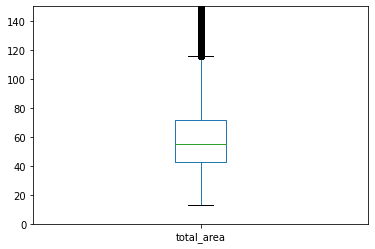

In [81]:
plt.ylim(0, 150)
data['total_area'].plot(kind='box')

*Объём записей составляет: 21315, минимальное значение: 13 м., максимальное значение 900 м., межквартильный размах: Q3-Q1=72-43=29(значит большинство помещений не слишком сильно отличаются по площади друг от друга: 29 метров между Q1 и Q3). Минимальное значение соотвествует адекватному если рассматривать апартаменты. Согласно диаграмме размаха выбросы имеются выше 75% перцентиля(Q3) и их довольно много, но точно ли они являются аномалиями? Максимальное значение довольно велико: посмотрим какие записи соответсвуют таким масштабам(определим можно ли считать такие значения выбросами или же нет в рамках данного атрибута).*

In [82]:
data.query('total_area > 500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_category,week_day,publication_year,publication_month,price_sq_m,floor_type,city_centers_nearest_km
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5,0.0,5,True,...,2.0,210.0,1802,апартаменты,5,2019,3,221870.05,последний,5.0
4237,1,50000000.0,517.0,2017-10-14,7,3.20,4,332.0,3,False,...,2.0,540.0,2334,люкс,5,2017,10,96711.80,другой,2.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0.0,NaN,14,люкс,3,2019,2,110169.49,другой,5.0
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.5,7,True,...,0.0,NaN,1078,апартаменты,3,2015,12,165680.47,последний,6.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.3,4,False,...,2.0,210.0,1792,люкс,1,2019,4,221799.75,последний,5.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,2.0,198.0,111,люкс,0,2017,12,485436.89,другой,5.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,2.0,318.0,106,люкс,2,2017,12,466666.67,последний,8.0


*Огромная площадь помещений обоснована высокой ценой и масштабами жилой площади, в рамках диаграммы размаза следовало бы такие записи удалить, но т.к. мы нашли природу такой высокой цены, то мы оставить такие записи и будем работать с ними. В любом случае при возможности стоит обратиться к лицам, предоставляющим данные для уточнения корректности.*

AxesSubplot(0.125,0.125;0.775x0.755)


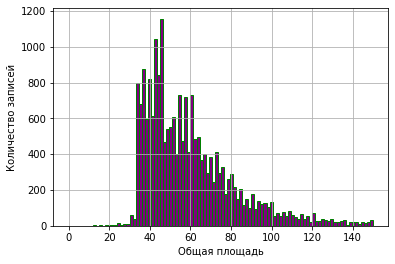

In [83]:
# Построим гистограмму для площади помещений
hist_PLT('total_area', data, 'Общая площадь', 0, 150, 100)

*Распределение Пуассона может быть несимметричным из-за отсутствия части данных. Например, если в выборке есть пропущенные или утраченные данные, это может привести к искажению формы распределения Пуассона. В любом случае набор данный выглядит вполне неплохо.*

*Результируем: с набором данных в 'total_area'(общая площадь) вполне всё адекватно: площадь помещений колеблится от 13-и метров до 900-а метров соотвественно, часть данных могла быть утрачена и по этой причине график распределение Пуассона не симметричен, но это также вполне реалистично, медианное значение равно 55-и(оно не искажается при наличии аномалий), среднее 63.47(отличия от медианного значения значительны т.к. имеются огромные помещения), межквартильный размах 29 м(не так уж и велик: в 50% центральной части данных дифференциация помещений по площади не велика, что не скажешь о диапозоне(900-13)).*

*2)Жилая площадь('living_area'):*

*Т. к. данный атрибут сильно похож по структуре и наполнению на предыдущий, то для него можно сформировать ответы на аналогичные вопросы:*

- Сколько составляет объём записей, максимальное и минимальное значения, межквартильнй размах?

- Есть ли в данных выбросы согласно стандартным статистическим нормам(нормам 'ящика с усами') и есть ли действительно они в контексте данного столбца?

- Соотвествует ли гистограмма нормальному распределнию(маловероятно) или распределению Пуассона, всё ли в порядке?

*Найдём первичные статистические характерестики набора данных*

In [84]:
data['living_area'].describe()

count    21315.000000
mean        33.439545
std         23.713524
min          0.000000
25%         18.700000
50%         30.200000
75%         42.800000
max        409.700000
Name: living_area, dtype: float64

*Посмотрим есть ли выбросы в наборе данныхс помощью диаграммы размаха:*

<AxesSubplot:>

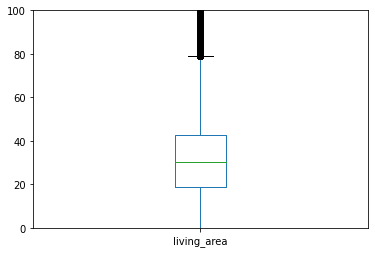

In [85]:
# Нарисуем box plot
plt.ylim(0, 100)
data['living_area'].plot(kind='box')

*Построим гистограмму для жилой площади помещений:*

AxesSubplot(0.125,0.125;0.775x0.755)


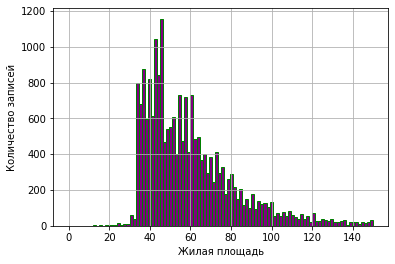

In [86]:
hist_PLT('total_area', data, 'Жилая площадь', 0, 150, 100)

*Результируем: Данный столбец сильно зависит от предыдущего столбца, поэтому гистограммы получились довольно похожими(распредление такое же: несимметричное Пуассона), минимальное значение равно нулю, что кажется странным, но мы прекрасно понимаем что у нас в записях присутствуют апартаменты которые не имеют жилой площади вовсе. На диаграмме размаха также множество выбросов выще третьего квартиля, которые в условии нашего столбца выбросами не являются(хотя это также при возможности следует уточнить у лиц, отвечающих за выгрузку данных), медианное значение равно ~ 30 м. среднее ~ 33 м., межквартильный размах равен 24.1(что немного меньше чем в предыдущем столбце, что очень даже логично) Набор данных считаем адекватным.*

*3)Площадь кухни('kitchen_area'):*

Этот атрибут также отвечает за площадь: прогоним его через идентичные таблицы.


*Будем отвечать и отталкиваться на тот же список вопросов что и в предыдущих атрибутах:*

*Найдём первичные статистические характерестики набора данных:*

In [87]:
data['kitchen_area'].describe()

count    19460.000000
mean        10.923450
std          6.002459
min          5.000000
25%          7.600000
50%          9.800000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

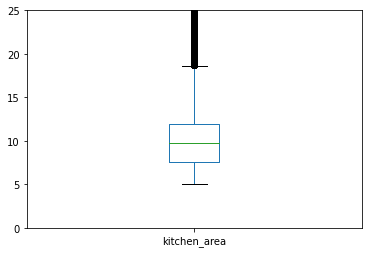

In [88]:
plt.ylim(0, 25)
data['kitchen_area'].plot(kind='box')

AxesSubplot(0.125,0.125;0.775x0.755)


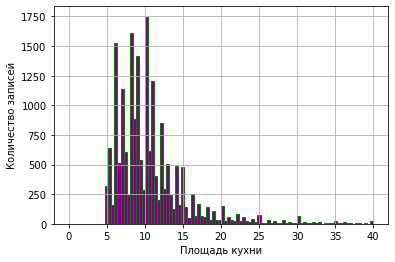

In [89]:
hist_PLT('kitchen_area', data, 'Площадь кухни', 0, 40, 100)

*Результируем: Набор данных имеет немного меньше записей(в сравнении с предыдущими), также имеются выбросы согласно диаграммы размаха выше третьего квартиля, которые аналогично в условиях нашего представления выбросами не являются, минимальная площадь равна 5-и метрах, максимальная 112-и м., медианное значение равно 9.8, среднее 10.8, межквартильный размах 4.4(также не велик). Данные более менее 
в порядке.*

*4)Цена объекта('last_price'):*

Поступим аналогично:

In [90]:
data['last_price'].describe()

count    2.131500e+04
mean     6.925168e+06
std      1.140140e+07
min      4.300000e+05
25%      3.700000e+06
50%      4.900000e+06
75%      7.100000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

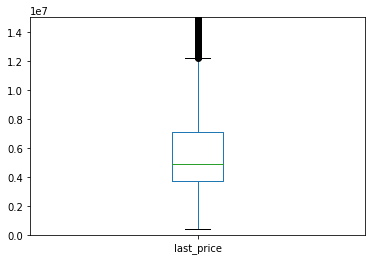

In [91]:
plt.ylim(0, 15000000)
data['last_price'].plot(kind='box')

AxesSubplot(0.125,0.125;0.775x0.755)


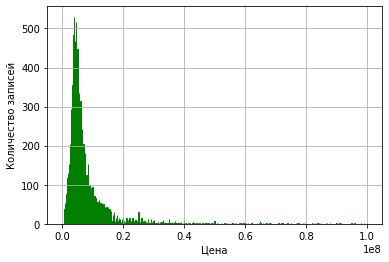

In [92]:
hist_PLT('last_price', data, 'Цена', 0, 100000000, 1000)

*Результируем: Распределение также соответствует несимметричному Пуассоновскому, есть действительно много выбивающихся значений(одно из них явно координально отличается, но согласно информации в открытых источниках за подобную сумму как-то продавали объект: всё равно уберём его т.к. нарушает восприятие общей картины). Все описательные статистические метрики приведены и наглядны в ячейке с использованием метода describe(). Интересно что ценники на объекты очень сильно отли* 

*5)Количество комнат('rooms'):*

In [93]:
data['rooms'].describe()

count    21315.000000
mean         2.188600
std          1.061624
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

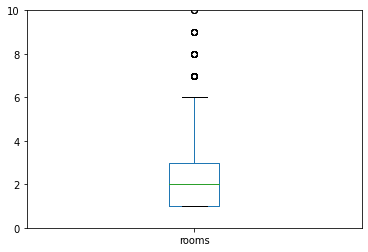

In [94]:
plt.ylim(0, 10)
data['rooms'].plot(kind='box')

AxesSubplot(0.125,0.125;0.775x0.755)


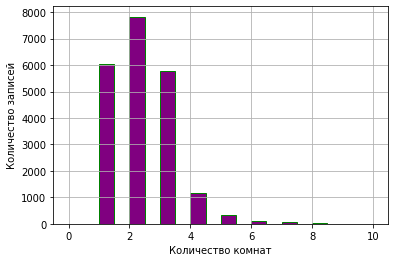

In [95]:
hist_PLT('rooms', data, 'Количество комнат', 0, 10, 20)

*Результируем: Распределение - Пуассоновское, минимальное количество = 1, медианное значение = 2, большинство помещений имеет 1, 2 или же 3 комнаты, все что больше убывают с каждой последующей добавленной комнатой*

*6)Высота потолков('ceiling_height'):*

In [96]:
data['ceiling_height'].describe()

count    21315.000000
mean         2.708744
std          0.229420
min          2.500000
25%          2.550000
50%          2.700000
75%          2.730000
max          4.900000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

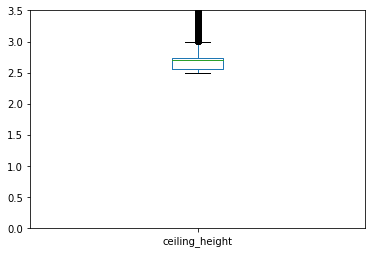

In [97]:
plt.ylim(0, 3.5)
data['ceiling_height'].plot(kind='box')

AxesSubplot(0.125,0.125;0.775x0.755)


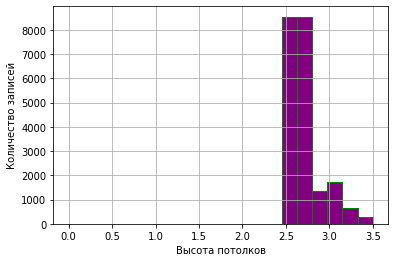

In [98]:
hist_PLT('ceiling_height', data, 'Высота потолков', 0, 3.5, 20)

Результируем: С первичными статистическими показателями мы также можем ознакомиться в ячейке с вызовом метода describe(). Из интересного: Распределение - несимметричное Пуассоновское, которое слева резко прерывается, что обусловленно требованием СНИПа к высоте потолков(на этапе предобработки мы удадиди всё что меньше 2.5 м). Аномальными значениями в данном наборе данных являются записи в которых высота потолка больше 3-х метров.

*7)Тип этажа помещения('floor_type'):*

In [99]:
data['floor_type'].describe()

count      21315
unique         3
top       другой
freq       15771
Name: floor_type, dtype: object

*Нарисуем круговую диаграмму для наглядного понимания сегментации типов этажей:*

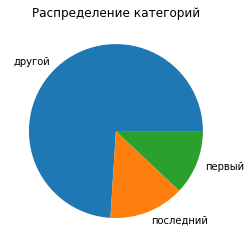

In [100]:
category_counts = data['floor_type'].value_counts()

# Построение круговой диаграммы

plt.pie(category_counts, labels=category_counts.index)
#plt.axis('equal')  # заставляет диаграмму быть кругом, а не эллипсом

plt.title('Распределение категорий')
plt.show()

*Из круговой диаграммы видим что первый и последний этажи вместе занимают примерно 25% процентов от всего количества(что на самом деле не так уж и мало), 75% приходиться на категорию "другой"*

*8)Общее количество этажей в доме('floors_total'):*

In [101]:
data['floors_total'].describe()

count    21315.000000
mean        10.784096
std          6.582498
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

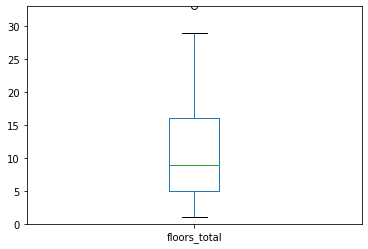

In [102]:
plt.ylim(0, 33)
data['floors_total'].plot(kind='box')

AxesSubplot(0.125,0.125;0.775x0.755)


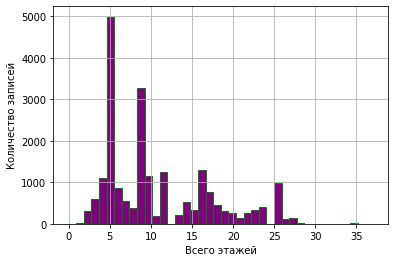

In [103]:
hist_PLT('floors_total', data, 'Всего этажей', 0, 37, 40)

Результируем: Распределние также Пуассоновское, хотя довольно странное, но двойных или тройных пиков нет, поэтому примем такой вид за адекватный в силу немногочисленности данных и наличия пропусков. Выбросами можно считать помещения выше 33(примено)-го этажа. Однозначный диапозон большинства выделить сложно. Наиболее многочисленно встречаются публикации помещений на 5-м этаже и на 9-м.

*9)Расстояние до центра города в метрах('city_centers_nearest'):*

In [104]:
data['city_centers_nearest'].describe()

count    16489.000000
mean     13944.821639
std       8461.487480
min        181.000000
25%       8842.000000
50%      12998.000000
75%      16186.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

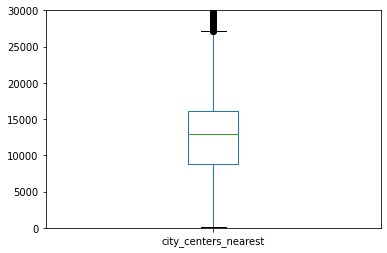

In [105]:
plt.ylim(0, 30000)
data['city_centers_nearest'].plot(kind='box')

AxesSubplot(0.125,0.125;0.775x0.755)


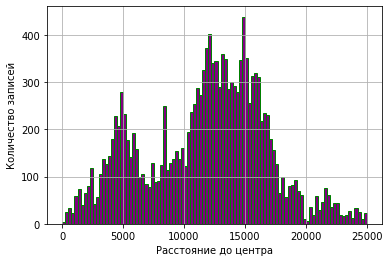

In [106]:
hist_PLT('city_centers_nearest', data, 'Расстояние до центра', 0, 25000, 100)

Результируем: Выбросами можно считать записи со значением выше 27500 м. до центра города. Из удивительного: записей у нас значительно меньше чем в предыдущих столбцах, но при этот график более плавныйт(хотя в нашем случае это также Пуассоновское). Настораживает не сильно выраженный пик на отметке в 5000 м.(примерно), не думаю что имеются проблемы с записью данных, скорее всего это обусловлено каким-то фактором(например активной и масштабной рекламной компанией вблизь центра города на пешеходных улицах и тд). Этот момент не стоит оставлять без внимание и стоит узнать информацию о этом явлении. 

*10)Расстояние до ближайшего парка('parks_nearest'):*

In [107]:
data['parks_nearest'].describe()

count    7366.000000
mean      491.848900
std       342.996876
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3064.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

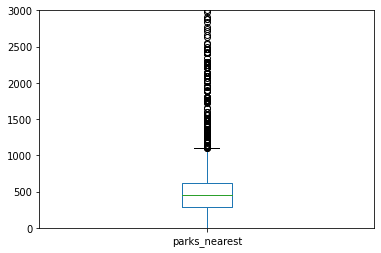

In [108]:
plt.ylim(0, 3000)
data['parks_nearest'].plot(kind='box')

AxesSubplot(0.125,0.125;0.775x0.755)


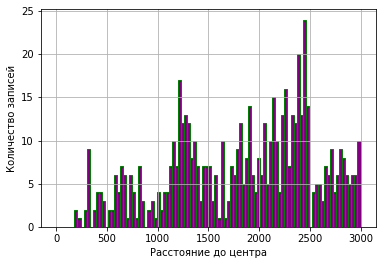

In [109]:
hist_PLT('city_centers_nearest', data, 'Расстояние до центра', 0, 3000, 100)

Результируем: распределение очень странное т.к. очень много пропусков, но скорее всего оно также Пуассоновское. Интересно что всё что дальше примено 1200 м. считается выбросом. Скорее всего есть особенность в записи расстояния до парка: если оно велико(больше 3000 м. примерно), то оно не вносится в базу. Минимальное расстояние до парка равно одному метру(думаю такое вполне возможно(хорошо бы было ознакомиться с этим объектом на сервисе для сверки действительности)).

# Как быстро продавались квартиры (столбец days_exposition)»:

*Построим гистограмму для количества дней продажи:*

AxesSubplot(0.125,0.125;0.775x0.755)


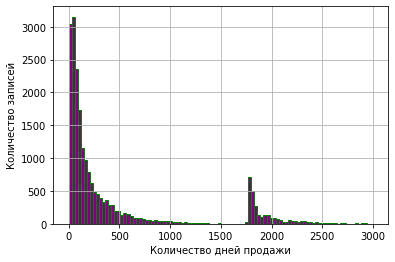

In [110]:
hist_PLT('days_exposition', data, 'Количество дней продажи', 0, 3000, 100)

*Распределение - Пуассоновское. На гистограмме мы видим нестандартную картину: у нас два пика которые уж очень похожи структурно, но отличаются в габаритах. Нужно разобраться с данным прецендентом: такого быть не должно(набор данных не соотвествует нормальному).*

*Посмотрим сколько теоретически могло существовать объявление, найдя интервал между датой первого объявления и последнего:*

In [111]:
print(data['first_day_exposition'].min(), '-', data['first_day_exposition'].max())

2014-11-27 00:00:00 - 2019-05-03 00:00:00


*Между данными датами разница в 1618 дней, а значит нам нужно проверить записи которые превышают этот диапозон:*

In [112]:
data.query('days_exposition > 1618')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_category,week_day,publication_year,publication_month,price_sq_m,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,1825,обычная,3,2019,3,120370.37,другой,16.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,0.0,22,True,...,0.0,NaN,1783,апартаменты,3,2019,4,110544.69,другой,12.0
44,13,5350000.0,40.00,2018-11-18,1,2.65,22,0.0,3,True,...,1.0,1152.0,1934,апартаменты,6,2018,11,133750.00,другой,12.0
45,17,5200000.0,50.60,2018-12-02,2,2.65,9,30.3,7,False,...,0.0,NaN,1920,обычная,6,2018,12,102766.80,другой,13.0
46,17,6600000.0,52.10,2019-01-31,2,2.60,24,29.7,9,False,...,0.0,NaN,1860,обычная,3,2019,1,126679.46,другой,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23680,14,5000000.0,59.00,2019-04-04,3,2.50,5,52.0,1,False,...,0.0,NaN,1797,обычная,3,2019,4,84745.76,первый,12.0
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5,45.5,3,False,...,NaN,NaN,1995,бюджетная,1,2018,9,33439.49,другой,NaN
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.4,17,False,...,0.0,NaN,1950,бизнес,4,2018,11,147586.21,другой,11.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,3.0,381.0,2541,обычная,1,2017,3,72490.85,другой,4.0


*Всё прояснилось: некорректные сроки хранения публикации создали второй пик на гистограмме: уж очень не желательно терять записи поэтому присвоем медианное значение всем записям где срок хранения больше 1618 дней и снова построим гистограмму.*

In [113]:
data.loc[data['days_exposition'] > 1618, 'days_exposition'] = data['days_exposition'].median()

AxesSubplot(0.125,0.125;0.775x0.755)


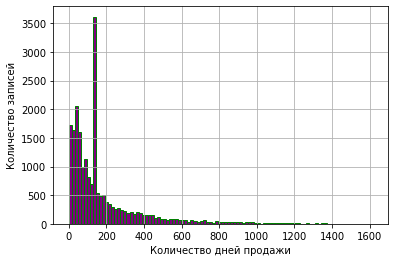

In [114]:
hist_PLT('days_exposition', data, 'Количество дней продажи', 0, 1618, 100)

*Теперь мы имеем адекватный набор данных из которого можно выводить какие-либо выводы.*

In [115]:
data['days_exposition'].describe()

count    21315.000000
mean       177.106451
std        207.745273
min          1.000000
25%         47.000000
50%        130.000000
75%        202.000000
max       1580.000000
Name: days_exposition, dtype: float64

*Медианное и среднее значение характеризуют центральную тенденцию выборки данных, однако они могут давать разные результаты в зависимости от распределения значений в выборке. На основе этого определимся: быстрыми продажами посчитаем те которые по срокам ниже первого квартиля, долгими продажами посчитаем те которые по срокам выше третьего квартиля. Соотвественно обычным сроком будем считать значения которые принадлежат межквартильному размаху. Необычайно долгими продажами будем считать те которые выходят из диапозонов [Q1 - 1.5*IQR] и [Q1 + 1.5*IQR] (считаются аномалиями согласно концепции ящика с усами).*

<AxesSubplot:>

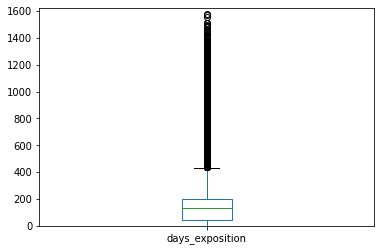

In [116]:
plt.ylim(0, 1618)
data['days_exposition'].plot(kind='box')

# Результируем: 

- обычные(по срокам) продажи: 47-202;

- быстрые(по срокам) продажи: меньше 47-и дней;

 - очень быстрые(по срокам) продажи: меньше 47-и дней;*

- долгие(по срокам) продажи: больше 202-ух дней;

- очень долгие(по срокам) продажи: больше 420-430 дней.

# «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров.

- общая площадь:

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

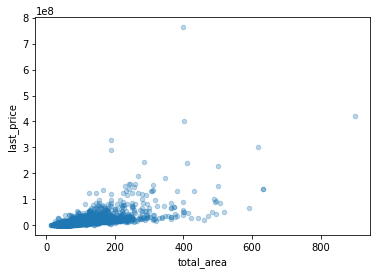

In [117]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

In [118]:
data['total_area'].corr(data['last_price'])

0.6530062551204303

*График и коэффицент Пирсона показывают следующее: взаимосвязь между площадью и ценой безусловно есть, но она не свидетельствует об однозначной зависимости(не является линейной).*

- жилая площадь:

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

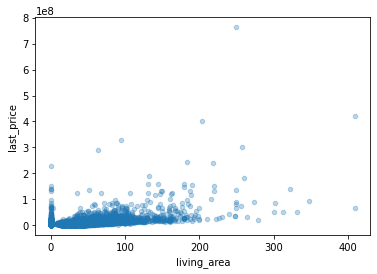

In [119]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)

In [120]:
data['living_area'].corr(data['last_price'])

0.4850369066012221

*Немного неожиданно что корреляция с жилой площадью меньше чем с общей.*


- площадь кухни:

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

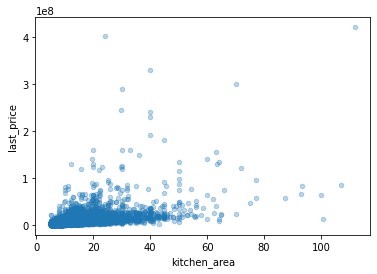

In [121]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)

In [122]:
data['kitchen_area'].corr(data['last_price'])

0.514510859712353

*Зависимость между площадью кухни и стоимостью помещения также присутствует(не линейная).*

- количество комнат:

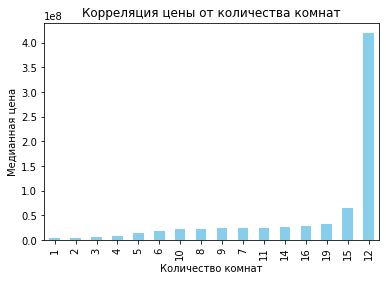

In [123]:
median_price_by_rooms = data.groupby('rooms')['last_price'].median().sort_values()

median_price_by_rooms.plot(kind='bar', color='skyblue')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена')
plt.title('Корреляция цены от количества комнат')
plt.show()


*Медианное значение 12-и комнатных помещений необычайно большое: видимо люди оценивают такое количество как идеальное. Чем больше комнат, тем больше медианная стоимость - это относительно верно(с 1-го по 6-й этаж такая тенденция прослеживается линейно).*

- тип этажа:

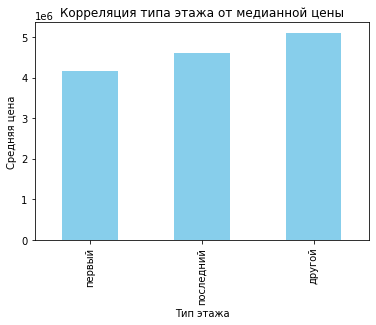

In [124]:

mean_price_by_category = data.groupby('floor_type')['last_price'].median().sort_values()

mean_price_by_category.plot(kind='bar', color='skyblue')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена')
plt.title('Корреляция типа этажа от медианной цены')
plt.show()

*Построив бар-плот(столбчатую диаграмму) мы делаем следующий вывод: крайние этажи(верхний или нижний) имеют медианное значение цены ниже чем иные. Если уточнять, то медианная цена помещений 1-го этажа меньше медианной цены последнего, а вместе их медианные значения меньше 'других' этажей. Отличаются медианные значения не особо сильно, поэтому делаем вывод что этот фактор влияет конечно, но очень незначительно.*

- дата размещения (день недели, месяц, год):

1)День недели:

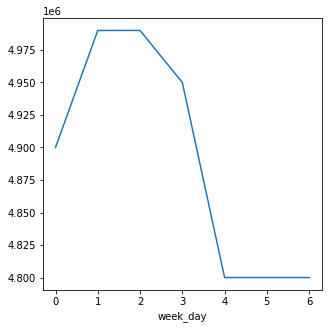

In [125]:
one_day_subset = data.groupby('week_day')['last_price'].median()
one_day_subset.plot(x='week_day', y=one_day_subset, figsize=(5,5))
plt.show()

*Медианная цена помещений в течении недели с понедельника по вторник растёт, вторник и среда - пиковые цены, затем идёт резкий спад, нижний предел достигается в пятницу и держится до воскресенья включительно.*

2)Месяц:

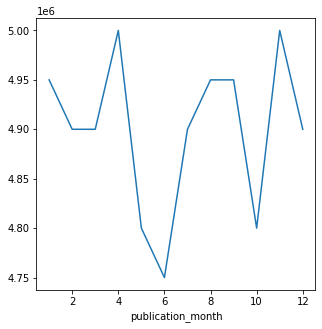

In [126]:
one_month_subset = data.groupby('publication_month')['last_price'].median()
one_month_subset.plot(x='publication_month', y=one_month_subset, figsize=(5,5))
plt.show()

*С марта месяца обычно медианная цена подымается и достигает пика в апреле(примерно), затем медианное значение падает и достигает дна в июне, потом снова происходит рост до сентября, после происходит падение медианной цены до октября, с октября по ноябрь - рост(в ноябре - пиковое значение), в январе наблюдается снова падение. Таким образом, самые высокие цены на помещение в апреле и ноябре, самые низкие в июне.*

3)Год:

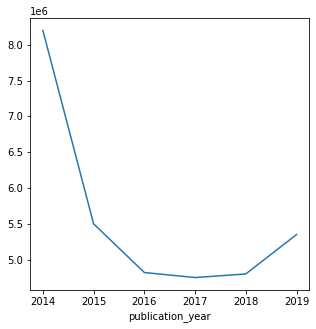

In [127]:
one_year_subset = data.groupby('publication_year')['last_price'].median()
one_year_subset.plot(x='publication_year', y=one_year_subset, figsize=(5,5))
plt.show()

*В 2014-м году были самые высокие цены на помещения исходя из нашего набора данных, после был спад до 2018-го года, в 2018-м начался рост, который продолжился вплоть до последней даты публикации.*

# Итог влияния различных факторов на цену:

1)Общая площадь: положительная корреляция, коэффицент корреляции = 0.6530062551204303;

2)Площадь кухни: положительная корреляция, коэффицент корреляции = 0.514510859712353;

3)Жилая площадь: положительная корреляция, коэффицент корреляции = 0.4850369066012221;

**Без коэффицента:**

4)Количество комнат: линейная корреляция для помещений с 1-й по 6-и комнатные помещения, аномально большая стоимость у 12-и комнатного.

5)Дата размещения: самые высокие цены на помещение в апреле и ноябре, самые низкие в июне; во вторник и среду пиковые цены, с пятницы по воскресенье - самые низкие, в 2014-м году были самые высокие цены из набора данных, в 2018-м начался рост который продолжился вплоть до последней даты публикации.

*6)Тип этажа: слабая зависимость, но она есть: первые этажи дешевле последних, а вместе они дешевле остальных(по медиане).*

# Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.

*Найдём 10 населённых пунктов с наибольшим числом объявлений:*

In [128]:
top_10_loc = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index.values

*Построим сводную таблицу с использованием запроса и внешней переменной:*

In [129]:
top_10_loc_median = data.query('@top_10_loc in locality_name').pivot_table(index='locality_name', values='price_sq_m', aggfunc='median')

*Построим барплот(столбчатую диаграмму) для наглядного восприятия:*

<AxesSubplot:xlabel='locality_name'>

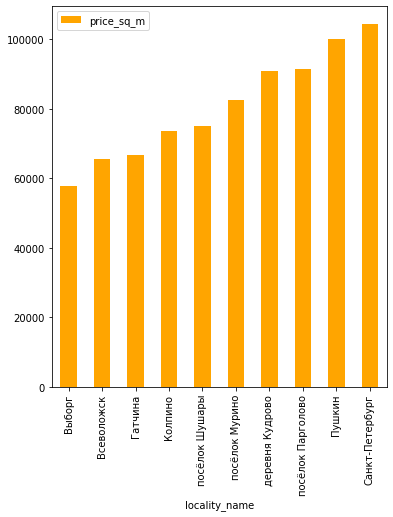

In [130]:
top_10_loc_median.sort_values(by='price_sq_m').plot(kind='bar', color='orange', figsize=(6, 7))

*Выведем средние значения в сводной таблице:*

In [131]:
top_10_loc_median.sort_values(by='price_sq_m').style.background_gradient('coolwarm')

,price_sq_m
locality_name,
Выборг,57894.740000
Всеволожск,65667.560000
Гатчина,66666.670000
Колпино,73629.110000
посёлок Шушары,75174.830000
посёлок Мурино,82417.580000
деревня Кудрово,90876.455000
посёлок Парголово,91579.710000
Пушкин,99993.590000


# Результат: 

*В тройку самого дорого жилья по средней стоимости квадратного метра входят следующие населённые пункты:*

- 1)Санкт-Петербург(115065.3 руб.);

- 2)Пушкин(103535.6 руб.);

- 3)поселок Парголово(91642.8руб.).

*В тройку самого дешёвого жилья по средней стоимости квадратного метра входят следующие населённые пункты:*

- 1)Выборг(58281.4 руб.);

- 2)Всеволожск(65737.8 руб.);

- 3)Гатчина(66666.6руб.).

In [132]:
only_spb_data = data.query('"Санкт-Петербург" in locality_name')

<AxesSubplot:xlabel='city_centers_nearest_km'>

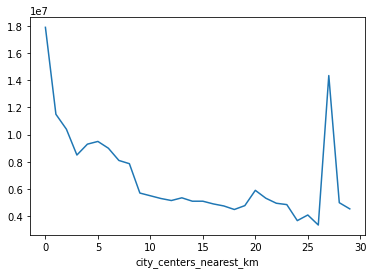

In [145]:
only_spb_data.groupby('city_centers_nearest_km')['last_price'].median().plot()

In [133]:
ospb_data_piv = only_spb_data.pivot_table(index='city_centers_nearest_km', values='last_price').style.background_gradient('coolwarm')
ospb_data_piv

,last_price
city_centers_nearest_km,
0.0,31449115.851852
1.0,21493811.640212
2.0,18101612.105263
3.0,11239453.501458
4.0,13490153.284661
5.0,14701572.862108
6.0,15864489.954315
7.0,15404583.550505
8.0,10432474.949275


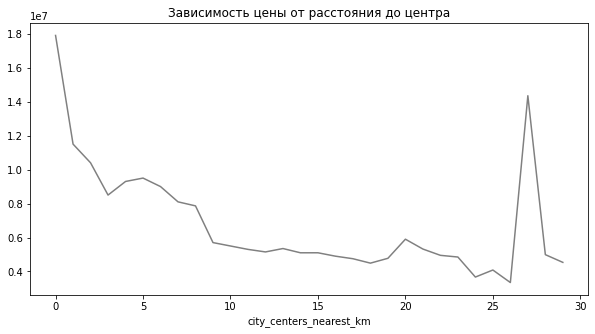

In [149]:
only_spb_data.groupby('city_centers_nearest_km')['last_price'].median()\
    .plot(figsize=(10, 5), color='grey', title = 'Зависимость цены от расстояния до центра');

In [135]:
data['city_centers_nearest_km'].corr(data['last_price'])

-0.20833393543923978

**Результируем: Коэффицент корреляции Пирсона показывает нам не сильную отрицательную корреляцию факторов: цена и расстояние до центра. Рассмотрим этот график более подробно: на расстоянии до 3 км(примерно) мы можем заметить ярко выраженную(линейную) обратную зависимость цены от расстояния(чем меньше расстояние, тем выше цена), но далее мы видим что такая тенденции сглаживается при увелечении расстояния, кроме расстояния от 27 км.(видимо там имеется какой-то иной фактор). Безусловно обратная зависимость есть, но она 'быстрогаснущаяя' т.е. не совсем выраженная.**

### Напишите общий вывод

**Нам удалось избавиться от значительного количества ошибочных(аномальных) записей, восстановить огромное количество пропусков, выявить и устранить неявные дубликаты в одном из атрибутов, убрать явные дубликаты, внести больше конкретики и понимания для каждого столбца датафрейма и подкорректировать типы данных. Создать новые атрибуты для более детального анализа, исследовать ряд атрибутов и устранить недочёты. Мы обработали ряд требуемых задач и получили полезные для бизнеса результаты(более конструктивно они отражены в нашем блокноте).**

**Выводы полезные для бизнеса/заказчика:**

1)Сроки продажи помещений:

- обычные(по срокам) продажи: 47-202;

- быстрые(по срокам) продажи: меньше 47-и дней;


- очень быстрые(по срокам) продажи: меньше 47-и дней;*


- долгие(по срокам) продажи: больше 202-ух дней;


- очень долгие(по срокам) продажи: больше 420-430 дней.

2)Факторы которые влияют на цену помещения:

- общая площадь, площадь кухни, жилая площадь имеют положительную корреляцию т.е. при увеличении этих факторов увеличивается и цена в большинстве случаев.

- Количество комнат: линейная корреляция для помещений с 1-й по 6-и комнатные помещения, аномально большая стоимость у 12-и комнатного.

- Дата размещения: самые высокие цены на помещение в апреле и ноябре, самые низкие в июне; во вторник и среду пиковые цены, с пятницы по воскресенье - самые низкие, в 2014-м году были самые высокие цены из набора данных, в 2018-м начался рост который продолжился вплоть до последней даты публикации.


- Тип этажа: слабая зависимость, но она есть: первые этажи дешевле последних, а вместе они дешевле остальных(по медиане).

3) Самые дорогие/дешёвые населённые пункты по стоимости квадратного метра:

В тройку самого дорого жилья по средней стоимости квадратного метра входят следующие населённые пункты:

- Санкт-Петербург(115065.3 руб.);


- Пушкин(103535.6 руб.);



- поселок Парголово(91642.8руб.).

*В тройку самого дешёвого жилья по средней стоимости квадратного метра входят следующие населённые пункты:*


- Выборг(58281.4 руб.);


- Всеволожск(65737.8 руб.);


- Гатчина(66666.6руб.).

**Таким образом, мы определили рыночную стоимость объектов недвижимости, установили параметры, влияющие на цену объектов и построили план-систему, которая способна отследить и устранить аномалии.**

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       + цена одного квадратного метра;
       + день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       + месяц публикации объявления;
       + год публикации объявления;
       + тип этажа квартиры (значения — «первый», «последний», «другой»);
       + расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        + общая площадь;
        + жилая площадь;
        + площадь кухни;
        + цена объекта;
        + количество комнат;
        + высота потолков;
        + тип этажа квартиры («первый», «последний», «другой»);
        + общее количество этажей в доме;
        + расстояние до центра города в метрах;
        + расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.